# This file explains how the used stations have been selected

In [47]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [48]:
metadata = pd.read_csv(f"data/metadata/metadata_2023_05_24.csv")
metadata.set_index("StationID", inplace=True)
metadata

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
StationID,,,,,,,,,,,,,,,,,,,,,
0y2w3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,44.794,-87.313
18ci3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,41.730,-86.910
20cm4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,42.090,-86.490
45T01,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,NDBC,2.1-meter ionomer foam buoy,48.008,-87.666
23020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,King Abdullah University of Science and Techno...,Buoy,22.162,38.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yabp4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,Station operated by Puerto Rico Seismic Network,Water Level Observation Network,18.055,-65.833
yata2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service,Water Level Observation Network,59.548,-139.733
ygnn6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,National Weather Service Eastern Region,GLOS Weather Station,43.262,-79.064


# Filter by location (only GoM)


        32°N                                32
102°W   GOM     82°W                -102     GOM     -82
        21°N                                21

In [1]:
# Define the range for latitude and longitude
lat_range = (21, 32)  # Replace lower_lat and upper_lat with your desired range
lon_range = (-102, -82)  # Replace lower_lon and upper_lon with your desired range

# Filter the DataFrame
metadata_GOM = metadata[(metadata['lat'].between(*lat_range)) & (metadata['lon'].between(*lon_range))]
metadata_GOM

NameError: name 'metadata' is not defined

#Filter by owner (only NDBC)

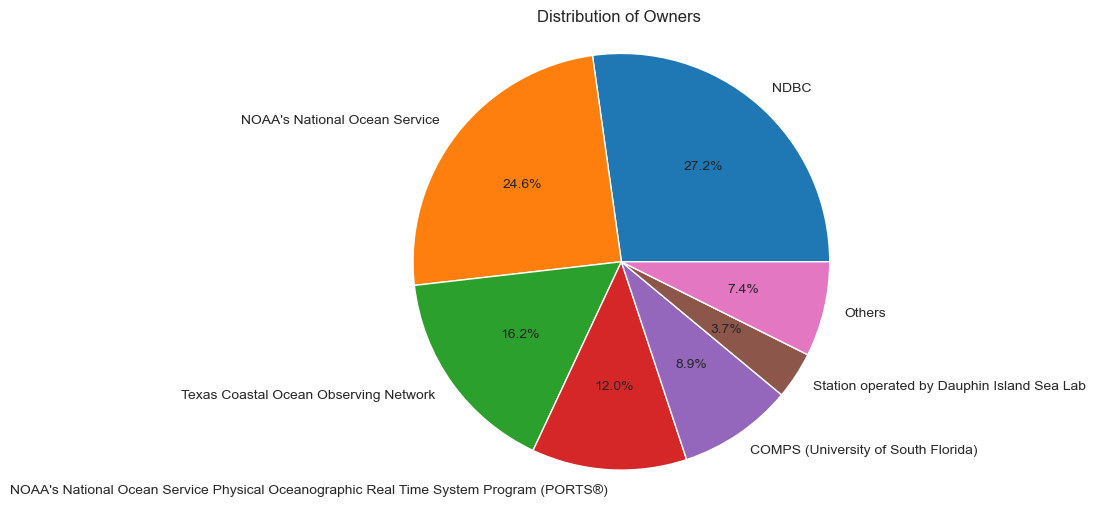

In [50]:
owner_counts = metadata_GOM['owner'].value_counts()

# Calculate percentages and filter owners below 2%
total_owners = sum(owner_counts)
percentages = (owner_counts / total_owners) * 100
filtered_indices = percentages >= 2

# Calculate the sum of filtered percentages for "others"
others_percentage = percentages[~filtered_indices].sum()

# Create new lists of labels and counts
filtered_labels = owner_counts.index[filtered_indices].tolist()
filtered_counts = owner_counts[filtered_indices].tolist()
filtered_labels.append("Others")
filtered_counts.append(others_percentage)

# Plot the modified pie chart
plt.figure(figsize=(8, 6))
plt.pie(filtered_counts, labels=filtered_labels, autopct='%1.1f%%')
plt.title('Distribution of Owners')
plt.axis('equal')
plt.show()

In [51]:
metadata_GOM_NDBC = metadata_GOM[metadata_GOM['owner'] == 'NDBC']
metadata_GOM_NDBC

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
StationID,,,,,,,,,,,,,,,,,,,,,
42001,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,NDBC,3-meter foam buoy,25.926,-89.662
42002,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,NDBC,3-meter foam buoy,26.055,-93.646
42003,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,NDBC,2.1-meter ionomer foam buoy,25.925,-85.616
42004,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,NDBC,12-meter discus buoy,27.500,-85.500
42005,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,NDBC,12-meter discus buoy,30.000,-85.900
42006,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,NDBC,6-meter NOMAD buoy,26.500,-96.000
42007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,NDBC,3-meter discus buoy,30.090,-88.769
42008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,NDBC,Platform BTA,28.700,-95.300
42009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,NDBC,10-meter discus buoy,29.300,-87.500


In [60]:
type_counts = metadata_GOM_NDBC['type'].value_counts()
type_counts

C-MAN Station                   16
3-meter discus buoy              9
3-meter foam buoy                8
12-meter discus buoy             7
USCG Large Navigational Buoy     4
Platform BTA                     3
2.1-meter ionomer foam buoy      2
6-meter NOMAD buoy               1
10-meter discus buoy             1
GE                               1
Name: type, dtype: int64

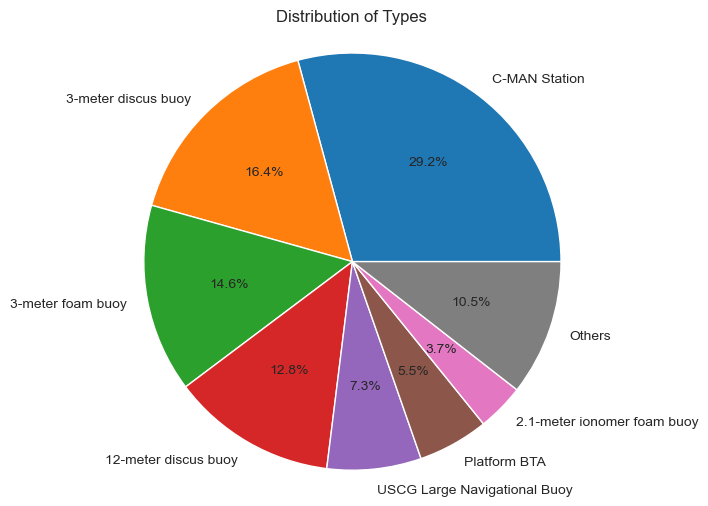

In [61]:
# Calculate percentages and filter owners below 2%
total_types = sum(type_counts)
percentages = (type_counts / total_types) * 100
filtered_indices = percentages >= 2

# Calculate the sum of filtered percentages for "others"
others_percentage = percentages[~filtered_indices].sum()

# Create new lists of labels and counts
filtered_labels = type_counts.index[filtered_indices].tolist()
filtered_counts = type_counts[filtered_indices].tolist()
filtered_labels.append("Others")
filtered_counts.append(others_percentage)

# Plot the modified pie chart
plt.figure(figsize=(8, 6))
plt.pie(filtered_counts, labels=filtered_labels, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.axis('equal')
plt.show()

In [62]:
metadata_filtered = metadata_GOM_NDBC[metadata_GOM_NDBC['type'].str.contains('buoy')]
metadata_filtered

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
StationID,,,,,,,,,,,,,,,,,,,,,
42001,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,NDBC,3-meter foam buoy,25.926,-89.662
42002,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,NDBC,3-meter foam buoy,26.055,-93.646
42003,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,NDBC,2.1-meter ionomer foam buoy,25.925,-85.616
42004,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,NDBC,12-meter discus buoy,27.500,-85.500
42005,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,NDBC,12-meter discus buoy,30.000,-85.900
42006,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,NDBC,6-meter NOMAD buoy,26.500,-96.000
42007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,NDBC,3-meter discus buoy,30.090,-88.769
42009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,NDBC,10-meter discus buoy,29.300,-87.500
42012,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NDBC,3-meter discus buoy,30.060,-87.548


In [91]:
availability = metadata_filtered.dropna(subset=['lat', 'lon']).drop(["owner", "type", "lat", "lon"], axis=1)
availability

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
StationID,,,,,,,,,,,,,,,,,,,,,
42001,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42002,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42003,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42004,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
42005,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
42006,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
42007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42012,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


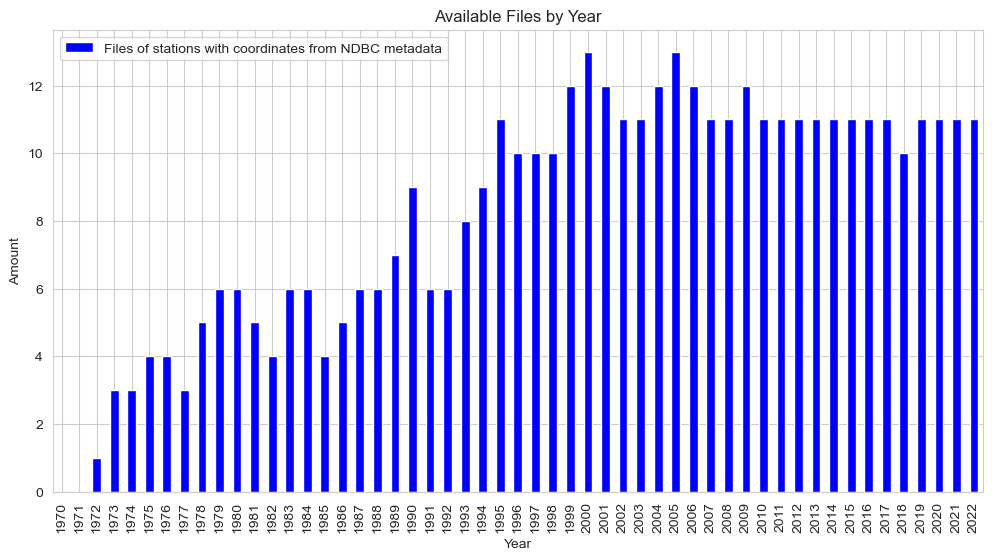

In [92]:
fig, ax = plt.subplots(figsize=(12,6))
availability.sum().plot(kind='bar', color="blue", label="Files of stations with coordinates from NDBC metadata")
plt.title('Available Files by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()

<AxesSubplot:ylabel='StationID'>

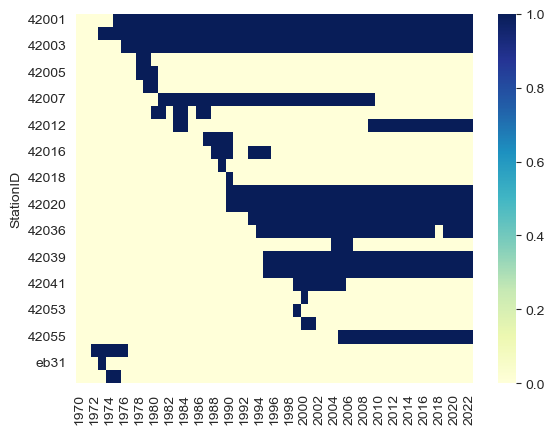

In [93]:
import seaborn as sns
sns.heatmap(availability, cmap='YlGnBu')

In [99]:
selected_columns = [str(year) for year in range(2002, 2023)]
df_selected = availability[selected_columns]
df_selected

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
StationID,,,,,,,,,,,,,,,,,,,,,
42001,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42002,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42003,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42007,True,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
42009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42012,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:ylabel='StationID'>

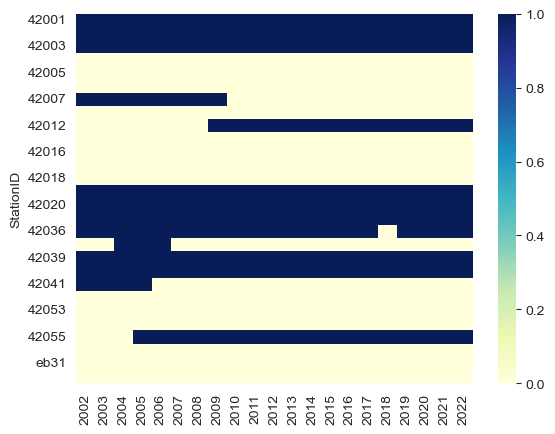

In [100]:
sns.heatmap(df_selected, cmap='YlGnBu')

In [102]:
df_selected = df_selected[~(~df_selected).all(axis=1)]

<AxesSubplot:ylabel='StationID'>

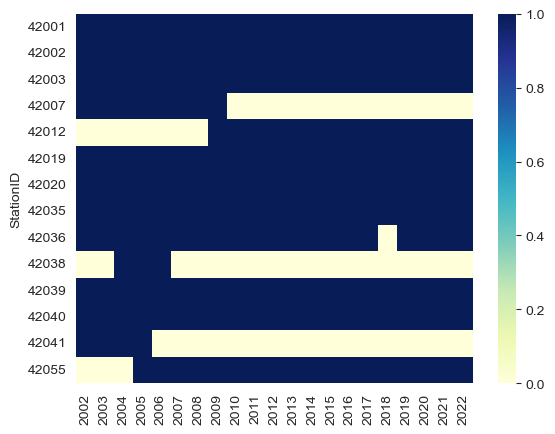

In [103]:
sns.heatmap(df_selected, cmap='YlGnBu')

In [120]:
print("Number of data files: ",df_selected.sum().sum())

Number of data files:  235


In [116]:
df_selected.index.tolist()


['42001',
 '42002',
 '42003',
 '42007',
 '42012',
 '42019',
 '42020',
 '42035',
 '42036',
 '42038',
 '42039',
 '42040',
 '42041',
 '42055']

In [117]:
df_selected.columns.tolist()

['2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']